In [72]:
import pandas as pd
import numpy as np
from lib import masters_data_analytics_lib as mlib
from lib import stats as stats

In [78]:
## City
city = "london"
search_term = "E1 6AN"

##
## LOAD ALL THE DATA FILES
##
## London Post Codes
sd_london_postcodes_file = "./data/streamlit_{}_postcodes_oa.csv".format(city)
sd_london_population_oa_file = "./data/streamlit_{}_population_oa.csv".format(city)
sd_london_household_oa_file = "./data/streamlit_{}_household_population_oa.csv".format(city)
sd_london_qualification_oa_file = "./data/streamlit_{}_qualifictation_population_oa.csv".format(city)

sd_london_population_oa_df   = mlib.csv_to_dataframe(sd_london_population_oa_file)
sd_london_postcodes_df = mlib.csv_to_dataframe(sd_london_postcodes_file)
sd_london_household_oa_df   = mlib.csv_to_dataframe(sd_london_household_oa_file)
sd_london_qualification_oa_df   = mlib.csv_to_dataframe(sd_london_qualification_oa_file) 


In [79]:
try:
    OAcode = sd_london_postcodes_df.loc[sd_london_postcodes_df["Post_Code"] == search_term]["OAcode"].values[0]
except:
    raise Exception("Unable to find post code {}".format(search_term))

other_post_codes = sd_london_postcodes_df.loc[sd_london_postcodes_df["OAcode"] == OAcode]["Post_Code"].to_numpy()
other_post_codes = np.delete(other_post_codes, np.where(other_post_codes == search_term))
number_of_boroughs = len(sd_london_postcodes_df["borough"].unique())


## Obtain the ward_name from the OACode
ward_name = sd_london_postcodes_df.loc[sd_london_postcodes_df["OAcode"] == OAcode]["WARD_NAME"].values[0]
borough   = sd_london_postcodes_df.loc[sd_london_postcodes_df['OAcode'] == OAcode]["borough"].values[0]

other_wards = sd_london_postcodes_df.loc[sd_london_postcodes_df["borough"] == borough]["WARD_NAME"]
other_wards = other_wards.unique()
other_wards = np.delete(other_wards, np.where(other_wards == borough))

post_code_search_longitude = sd_london_postcodes_df.loc[sd_london_postcodes_df["Post_Code"] == search_term]["longitude"].to_numpy()
post_code_search_latitude = sd_london_postcodes_df.loc[sd_london_postcodes_df["Post_Code"] == search_term]["latitude"].to_numpy()

pc_longitudes = sd_london_postcodes_df.loc[sd_london_postcodes_df["borough"] == borough]["longitude"].to_numpy()
pc_latitudes  = sd_london_postcodes_df.loc[sd_london_postcodes_df["borough"] == borough]["latitude"].to_numpy()


In [80]:
### Stats

###
### Population
###
pop_all_stats	  = stats.generate_stats(sd_london_population_oa_df, borough, ward_name, OAcode, "All")
pop_male_stats	  = stats.generate_stats(sd_london_population_oa_df, borough, ward_name, OAcode, "Males")
pop_female_stats  = stats.generate_stats(sd_london_population_oa_df, borough, ward_name, OAcode, "Females")
pop_density_stats = stats.generate_stats(sd_london_population_oa_df, borough, ward_name, OAcode, "DensityPPH")


In [81]:
### Male female ratio
pop_male_female_borough_total = pop_male_stats["borough_sum"] + pop_female_stats["borough_sum"]
pop_male_ratio = round(pop_male_stats["borough_sum"]/pop_male_female_borough_total * 100,0)
pop_female_ratio = round(pop_female_stats["borough_sum"]/pop_male_female_borough_total * 100,0)

pop_male_female_city_borough_total = pop_male_stats["city_sum"] + pop_female_stats["city_sum"]
pop_male_city_ratio = round(pop_male_stats["city_sum"]/pop_male_female_city_borough_total * 100,0)
pop_female_city_ratio = round(pop_female_stats["city_sum"]/pop_male_female_city_borough_total * 100,0)

print(pop_male_ratio)


55.0


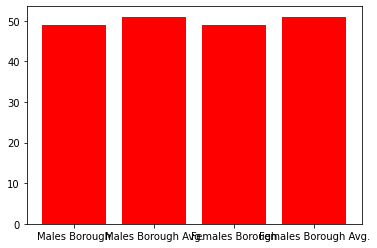

In [27]:
import matplotlib.pyplot as plt

# create data
x = ["Males Borough", "Males Borough Avg.", "Females Borough", "Females Borough Avg."]
y1 = [pop_male_ratio, pop_female_ratio, pop_male_city_ratio, pop_female_city_ratio]
  
# plot bars in stack manner
plt.bar(x, y1, color='r')
# plt.bar(x, y2, bottom=y1, color='b')
plt.show()

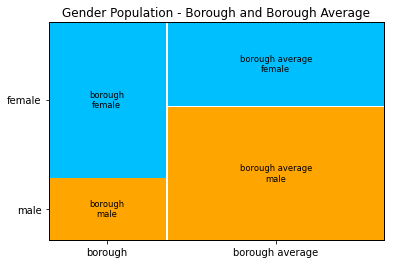

In [47]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import pylab
from itertools import product
import numpy as np

population_gender_borough_act_avg = list(product(['borough', 'borough average'], ['male', 'female']))
index = pd.MultiIndex.from_tuples(population_gender_borough_act_avg, names=['borough', 'borough average'])

pop_male_ratio = 20
pop_male_city_ratio = 50
pop_female_ratio = 80
pop_female_city_ratio = 50

data = pd.Series([pop_male_ratio, pop_male_city_ratio, pop_female_ratio, pop_female_city_ratio], index=index)
props = lambda key: {'color': 'orange' if 'male' in key else 'deepskyblue'}
mosaic(data, gap=0.01, title='Gender Population - Borough and Borough Average', properties=props)


mlib.save_plot(plot=pylab, path="c:/temp/", name="x.png", save_artefacts=True)
pylab.show()
     

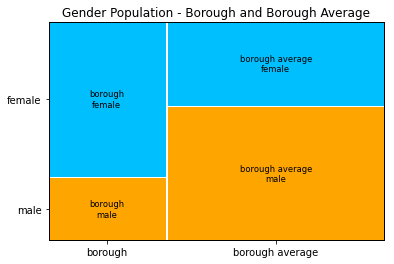

In [71]:
import pandas as pd
import pylab
import numpy as np
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product


def mekko_chart(data, names, categories, title):

    labels = list(product(names, categories))
    index = pd.MultiIndex.from_tuples(labels, names=names)

    data = pd.Series(data, index=index)
    props = lambda key: {"color": "orange" if categories[0] in key else "deepskyblue"}
    mosaic(data, gap=[0.01, 0.01], title=title, properties=props)
    
    return pylab


pop_male_ratio = 20
pop_male_city_ratio = 50
pop_female_ratio = 80
pop_female_city_ratio = 50

data = [pop_male_ratio, pop_male_city_ratio, pop_female_ratio, pop_female_city_ratio]
names = ["borough", "borough average"]
categories = ["male", "female"]
title = "Gender Population - Borough and Borough Average"
mekko_chart = mekko_chart(data=data, names=names, categories=categories, title=title) 

mlib.save_plot(plot=mekko_chart, path="c:/temp/", name="mekko_chart.png", save_artefacts=True)
# mekko_chart.show()
     